### 목표
- 손글씨 데이터 숫자(0~9)를 분류하는 모델을 만들어보자
- 분류 모델의 불확실성을 확인하고 이해해보자
- 이미지 데이터의 형태를 알아보자

In [4]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# 데이터 가져오기 
digit = pd.read_csv('data/digit_train.csv')
digit

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- label : 0 ~ 9까지 정답이 들어있는 컬럼
- pixelXXX : 이미지의 픽셀 정보값이 들어있는 컬럼

### 전처리
- 학습용 데이터이기 때문에 깔끔하게 처리되어있다.

### EDA

In [6]:
img0 = digit.iloc[0, 1:]

In [7]:
print(img0.min())
print(img0.max())
# 현재 손글씨 데이터는 흑백 데이터
# 0인 경우 검은색
# 255인 경우 흰색

0
255


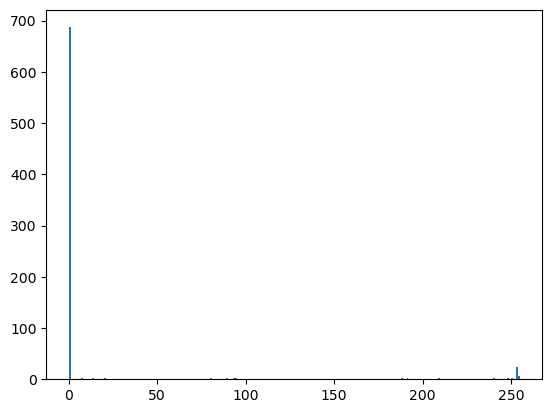

In [8]:
plt.hist(img0, bins=255)
plt.show()
# 검정이 제일 많고 흰색이 적다

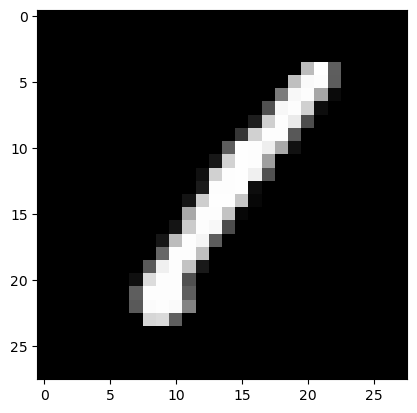

In [9]:
# 이미지 출력 방법
# reshape : 2차원 데이터로 바꿔주기
# 28 * 28 = 784 (컬럼수)
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

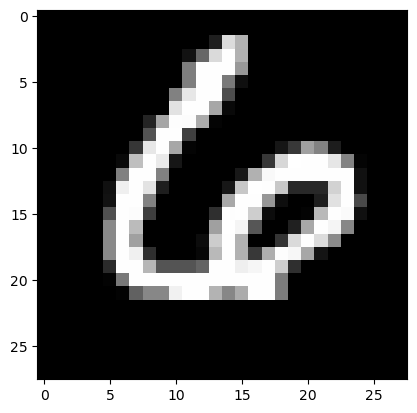

In [10]:
img0 = digit.iloc[32000, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

In [12]:
rs = digit.iloc[32000, 0]
rs

6

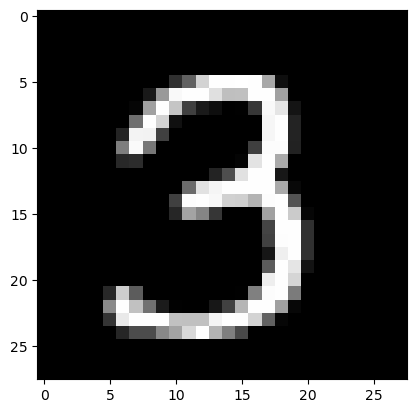

3


In [13]:
img0 = digit.iloc[1273, 1:]
plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

rs = digit.iloc[1273, 0]
print(rs)

In [14]:
# 문제 / 정답 나눠주기
X = digit.iloc[ : , 1 : ]
y = digit['label']

### 선형 분류 모델 사용하기

In [15]:
# model import
from sklearn.linear_model import LogisticRegression 

In [16]:
# 모델 객체 생성
logi = LogisticRegression()

In [17]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                test_size = 0.3,
                                                random_state = 7)

In [18]:
# 모델 학습
logi.fit(X_train, y_train)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# 모델 성능 평가
logi.score(X_test, y_test)
# 약 91%
# 1. 전처리가 잘 되어있다 
# 2. 데이터의 볼륨이 커서 특성에 대해 학습을 많이 진행

0.9138095238095238

In [20]:
logi.score(X_train, y_train)

0.9429591836734694

In [21]:
# 모델 예측 진행
pre = logi.predict(X_test)
pre

array([1, 1, 4, ..., 2, 4, 1], dtype=int64)

### 스케일링 적용

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mm_scale = MinMaxScaler()

In [24]:
mm_scale.fit(X_train)

MinMaxScaler()

In [25]:
# 스케일링 적용
X_train_mm = mm_scale.transform(X_train)
X_test_mm = mm_scale.transform(X_test)

(array([649.,  14.,   7.,   5.,   9.,   6.,   2.,   6.,  15.,  71.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

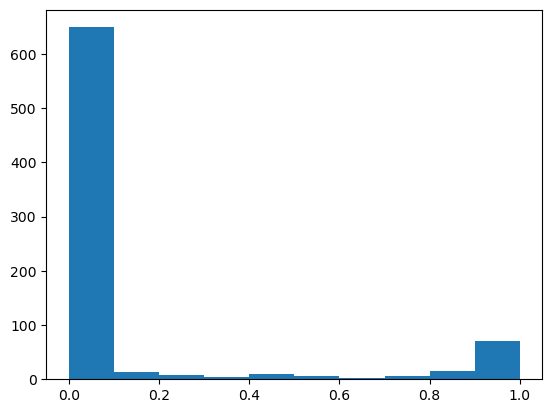

In [26]:
plt.hist(X_train_mm[0])

In [27]:
logi2 = LogisticRegression()
logi2.fit(X_train_mm, y_train)
logi2.score(X_test_mm, y_test)
# 약 91% -> 0.3% 성능 증가

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9169047619047619

### knn 모델

In [28]:
# knn 모델 사용해보기 
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train_mm, y_train)
# knn 모델 속도 빠름 + 스케일링 => 속도 빠름

KNeighborsClassifier()

In [32]:
knn.score(X_test_mm, y_test)

0.9695238095238096

### 분류 예측의 불확실성

In [34]:
# predict_proba : 분류 예측을 진행할 때 각 정답별 예측 확률을 보여주는 기능
knn.predict_proba(X_test.values[50:80])
# 29개를 뽑아봤을 때, 각각 10개가 들어있다. 
# --> 0 ~ 9 일 확률 [0일 확률, 1일 확률, 2일 확률, ... , 9일 확률]
# --> 확률 정보가 높은 정보로 예측 

array([[0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.2, 0.2],
       [0.2, 0. , 0.6, 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.4, 0.4],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ],
       [0.2, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.2, 0. ],
       [0.2, 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.2, 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

- predict_proba : 각 정답별 예측 확률을 뽑아서 가장 높은 확률을 가진 정답을 예측값으로 도출
- 각 확률 중 가장 높은 확률값만 가져와서 현재 집어넣은 데이터에 예측 확률을 추출 후  출력해서 사용할 수 있다. 